# Análise Exploratória de Dados (EDA)

In [224]:
import pandas as pd

In [225]:
df = pd.read_csv("dados_concreto - Sheet1.csv")

In [226]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,Alto
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,Alto
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27,Baixa
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05,Baixa
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30,Baixa


In [227]:
df.shape

(2029, 10)

In [228]:
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength,Strength Category
1203,797.0,446.3,0.0,171.3,35.8,2300.7,1232.6,182.0,74.90,Alto
1306,351.9,0.0,307.5,207.3,13.2,1748.3,2045.9,53.2,32.60,Baixa
264,212.0,0.0,124.8,159.0,7.8,1085.4,799.5,3.0,19.52,Baixa
552,158.8,238.2,0.0,185.7,0.0,1040.6,734.3,7.0,9.62,Baixa
1581,433.5,0.0,0.0,518.4,0.0,1690.6,1134.0,4.5,9.00,Baixa


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         2029 non-null   float64
 1   Blast Furnace Slag             2029 non-null   float64
 2   Fly Ash                        2029 non-null   float64
 3   Water                          2029 non-null   float64
 4   Superplasticizer               2029 non-null   float64
 5   Coarse Aggregate               2029 non-null   float64
 6   Fine Aggregate                 2029 non-null   float64
 7   Age                            2029 non-null   float64
 8   Concrete compressive strength  2020 non-null   float64
 9   Strength Category              2029 non-null   object 
dtypes: float64(9), object(1)
memory usage: 158.6+ KB


In [230]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2020.000000
mean,415.147610,107.776688,78.604091,264.240315,9.045293,1444.538492,1139.313258,67.255643,35.886683
std,237.133806,145.230234,106.149019,111.056771,10.239884,604.194394,481.913282,103.260526,16.860121
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.100000
25%,250.000000,0.000000,0.000000,182.000000,0.000000,967.100000,776.400000,14.000000,23.500000
50%,350.400000,26.000000,0.000000,206.000000,7.800000,1104.000000,889.000000,28.000000,34.675000
75%,512.400000,187.000000,136.200000,345.800000,13.600000,1911.800000,1502.800000,75.600000,46.230000
max,1487.600000,923.700000,500.900000,639.900000,83.700000,3150.000000,2779.300000,1022.000000,87.200000


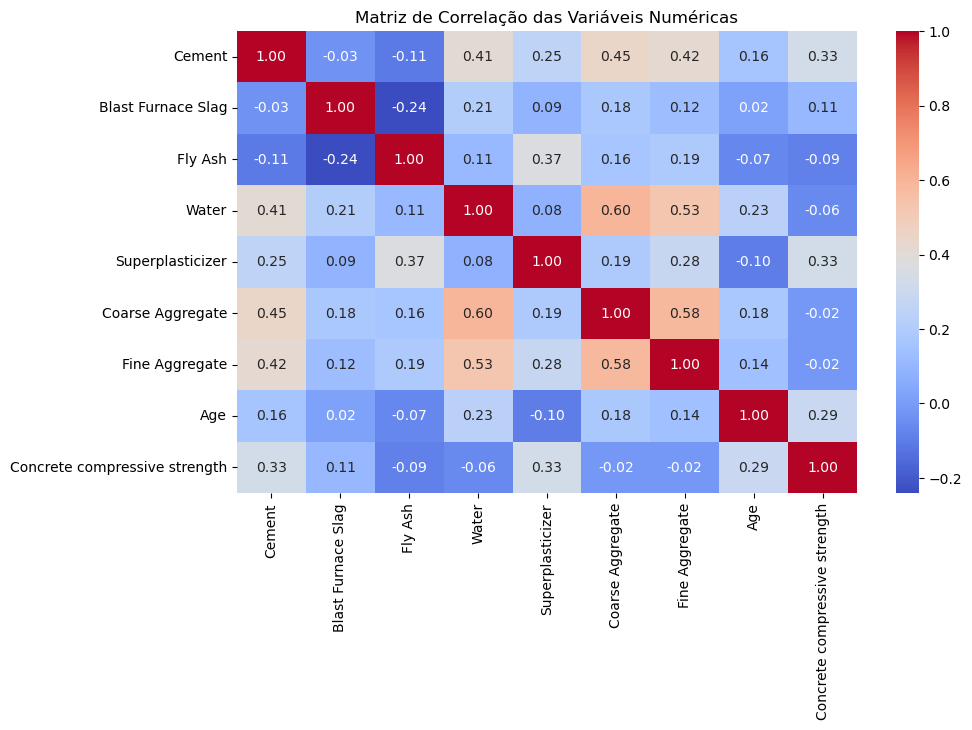

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

numericas = df.select_dtypes(include=['float64', 'int64'])

corr = numericas.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

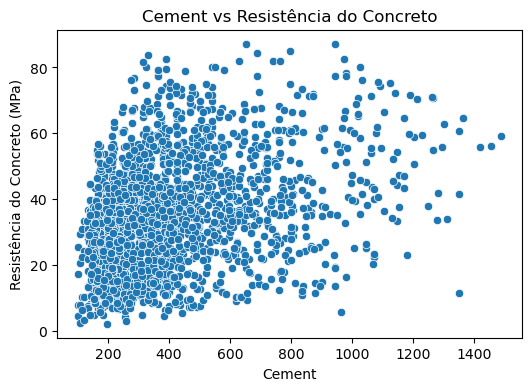

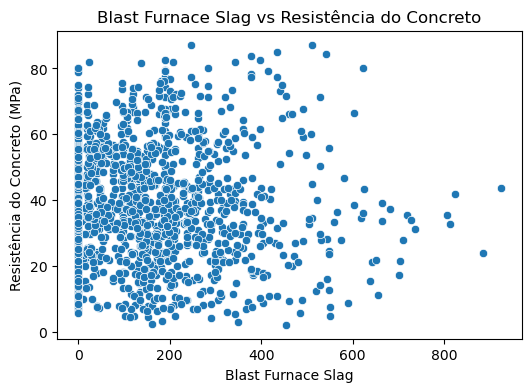

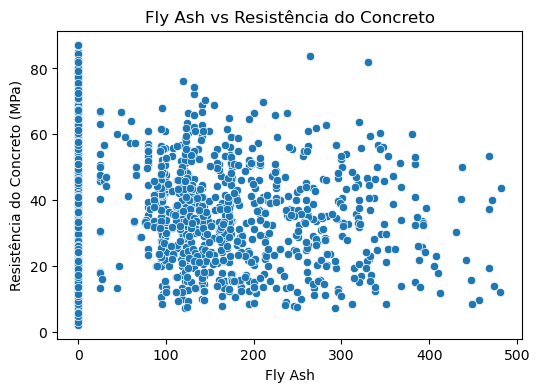

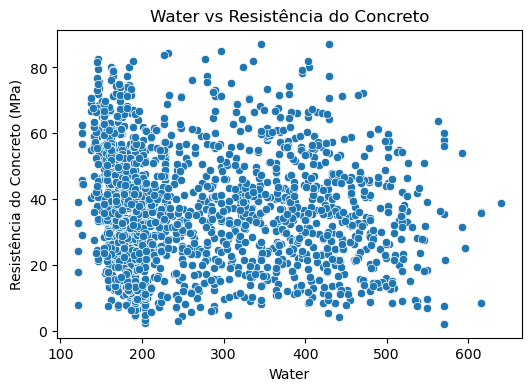

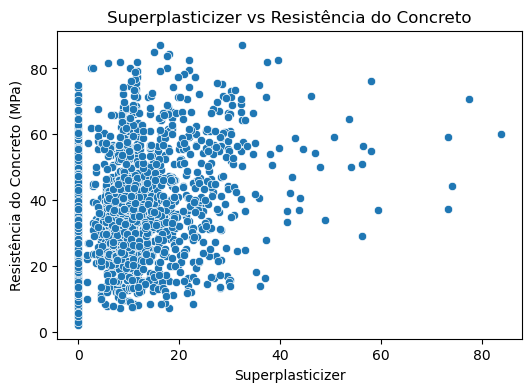

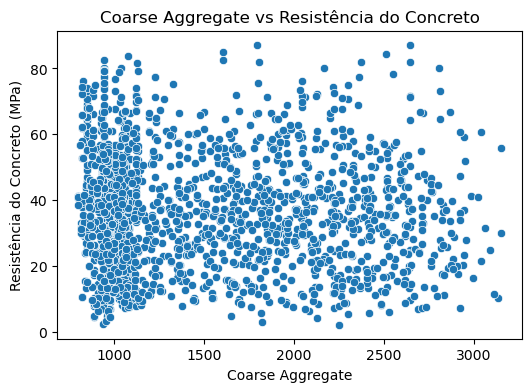

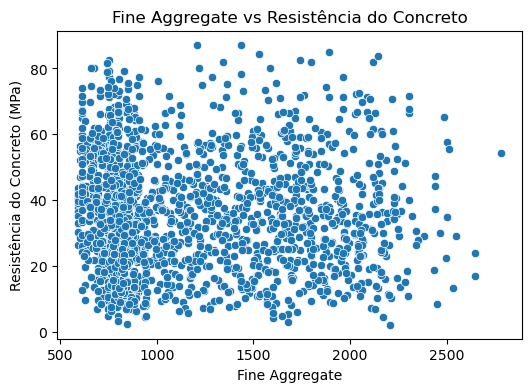

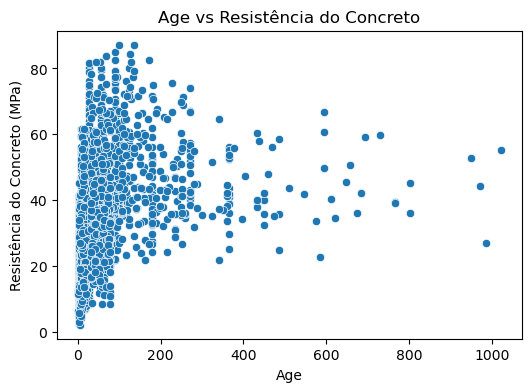

In [232]:
variaveis = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water',
             'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']

for var in variaveis:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[var], y=df['Concrete compressive strength'])
    plt.title(f"{var} vs Resistência do Concreto")
    plt.xlabel(var)
    plt.ylabel("Resistência do Concreto (MPa)")
    plt.show()

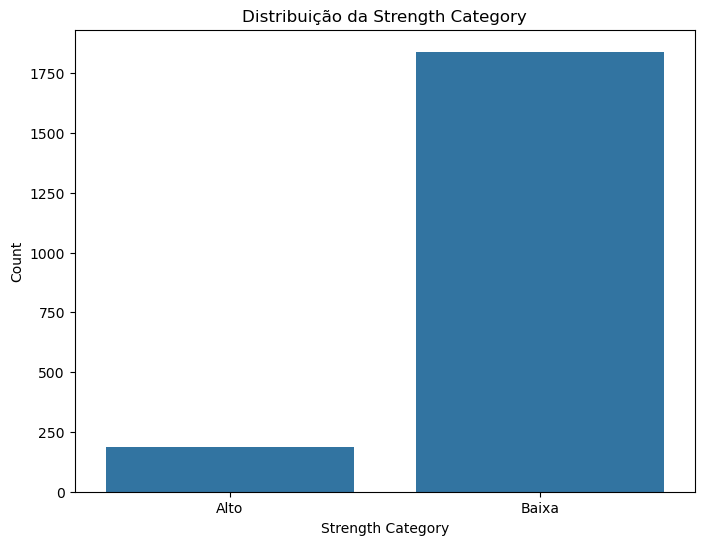

In [233]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Strength Category')
plt.title('Distribuição da Strength Category')
plt.xlabel('Strength Category')
plt.ylabel('Count')
plt.show()

# Tratamento de Dados

In [234]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    9
Strength Category                0
dtype: int64

In [235]:
df = df.dropna(axis=0, how='any')

In [236]:
df.duplicated().sum()

np.int64(25)

In [237]:
df = df.drop_duplicates()

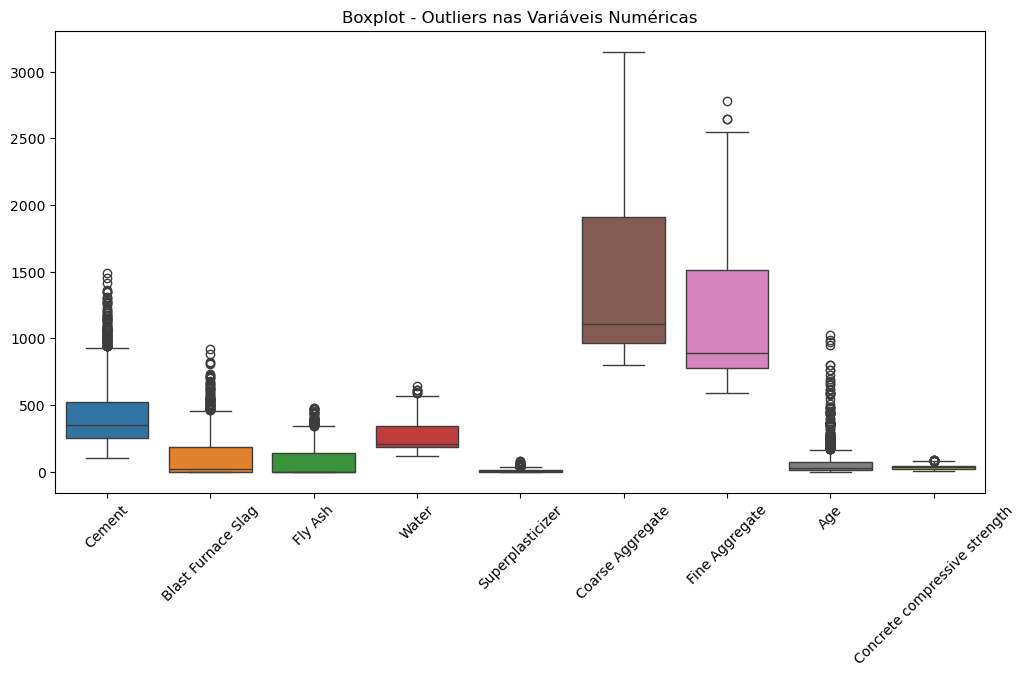

In [238]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.title("Boxplot - Outliers nas Variáveis Numéricas")
plt.show()

In [239]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]

print("DataFrame sem outliers:", df.shape)

DataFrame sem outliers: (1533, 10)


In [240]:
X = df.drop('Strength Category', axis=1)  
y = df['Strength Category']               

y = pd.get_dummies(y, prefix='Strength Category')

print(X.head())
print(y.head())

   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
1   540.0                 0.0      0.0  162.0               2.5   
5   266.0               114.0      0.0  228.0               0.0   
7   380.0                95.0      0.0  228.0               0.0   
8   266.0               114.0      0.0  228.0               0.0   
9   475.0                 0.0      0.0  228.0               0.0   

   Coarse Aggregate  Fine Aggregate   Age  Concrete compressive strength  
1            1055.0           676.0  28.0                          61.89  
5             932.0           670.0  90.0                          47.03  
7             932.0           594.0  28.0                          36.45  
8             932.0           670.0  28.0                          45.85  
9             932.0           594.0  28.0                          39.29  
   Strength Category_Alto  Strength Category_Baixa
1                    True                    False
5                   False                    

In [241]:
from sklearn.preprocessing import LabelEncoder

X = df.drop('Strength Category', axis=1)
y = df['Strength Category']

le = LabelEncoder()
y = le.fit_transform(y)

# Construção e Avaliação de Modelos de Regressão

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

X = df.drop(['Concrete compressive strength', 'Strength Category'], axis=1)
y = df['Concrete compressive strength']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("RandomF...")

for real, pred in zip(y_test[:10], y_pred[:10]):
    print(f"Real: {real:.2f} | Previsto: {pred:.2f}")

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

RandomF...
Real: 40.93 | Previsto: 45.17
Real: 50.70 | Previsto: 57.16
Real: 55.55 | Previsto: 49.70
Real: 14.70 | Previsto: 14.14
Real: 45.90 | Previsto: 38.19
Real: 35.23 | Previsto: 26.86
Real: 41.94 | Previsto: 43.25
Real: 44.80 | Previsto: 55.74
Real: 38.00 | Previsto: 44.51
Real: 11.40 | Previsto: 13.19
MAE: 5.02
R²: 0.76


In [243]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)

print("Regressão Linear")

for real, pred in zip(y_test[:10], y_pred_lin[:10]):
    print(f"Real: {real:.2f} | Previsto: {pred:.2f}")

print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

Regressão Linear
Real: 40.93 | Previsto: 36.00
Real: 50.70 | Previsto: 42.94
Real: 55.55 | Previsto: 44.82
Real: 14.70 | Previsto: 25.92
Real: 45.90 | Previsto: 35.92
Real: 35.23 | Previsto: 26.98
Real: 41.94 | Previsto: 35.99
Real: 44.80 | Previsto: 59.48
Real: 38.00 | Previsto: 42.36
Real: 11.40 | Previsto: 6.57
MAE: 8.38
R²: 0.48


In [244]:
#Podemos perceber que o RandomForest performou melhor que a regressão linear
#Ele teve R² de 76% sendo maior que a regressão
#MAE de 5.02 uma escala de erro menor que a regressão

# Predizendo o resultado

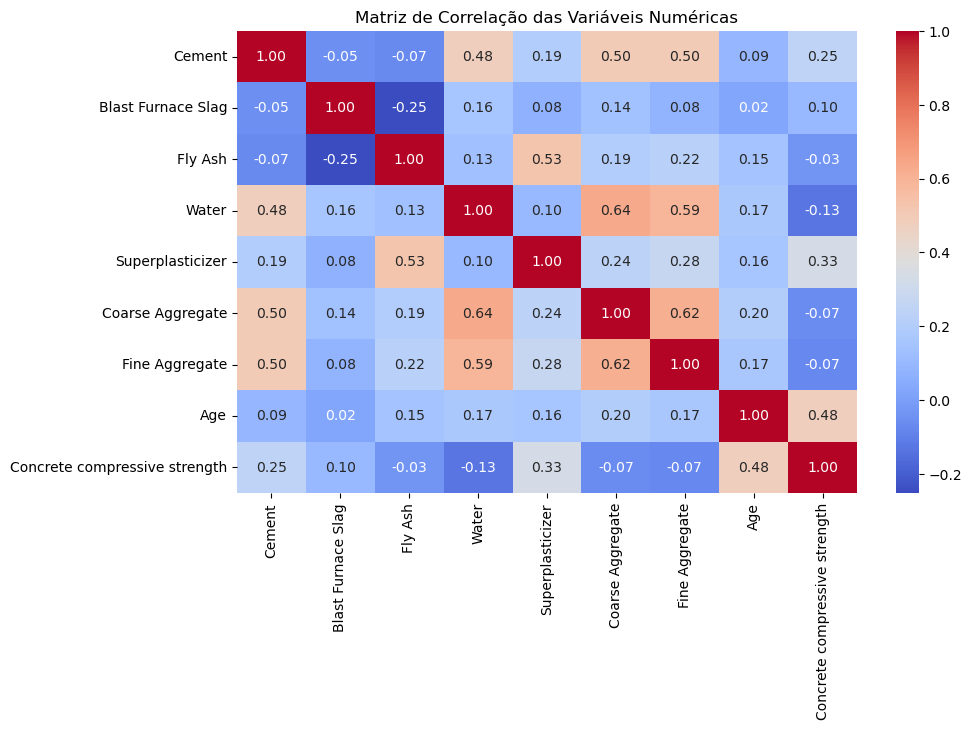

In [245]:
numericas = df.select_dtypes(include=['float64', 'int64'])

corr = numericas.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

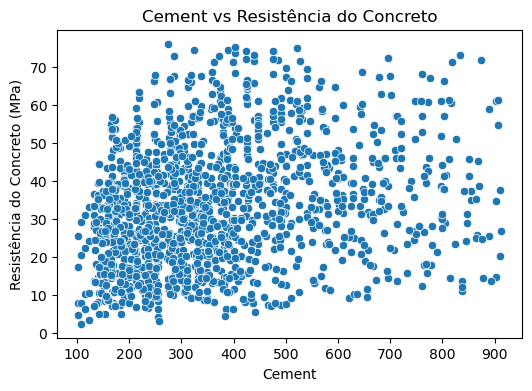

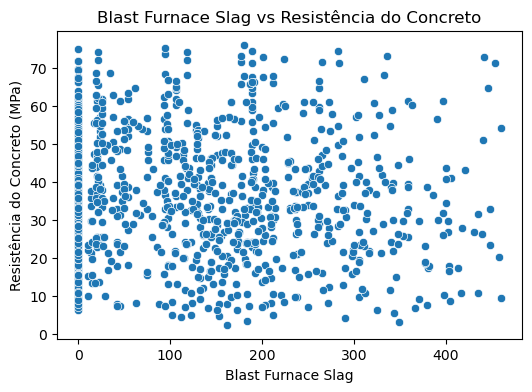

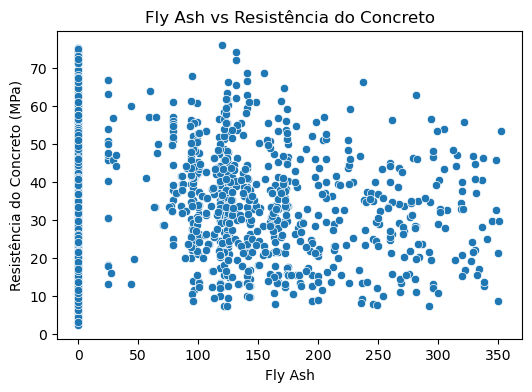

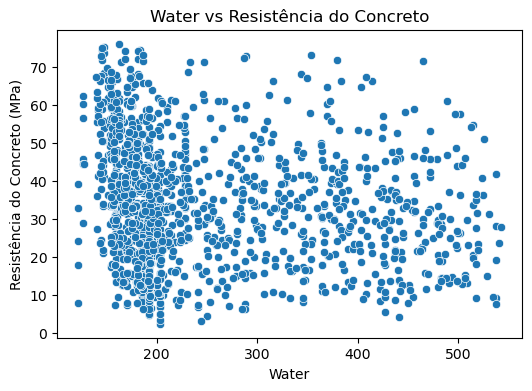

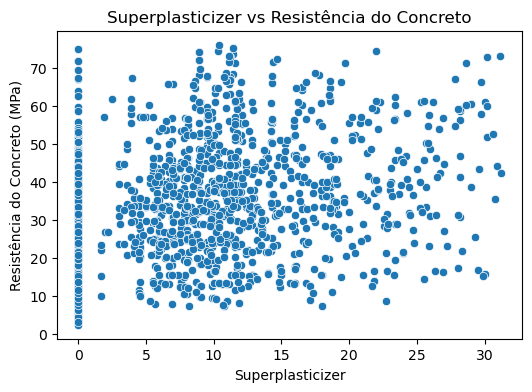

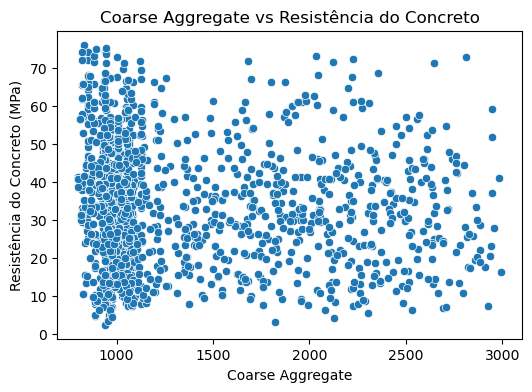

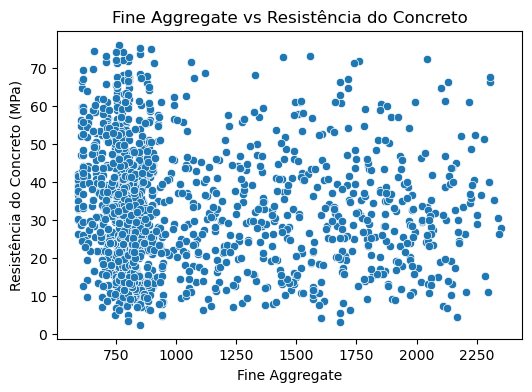

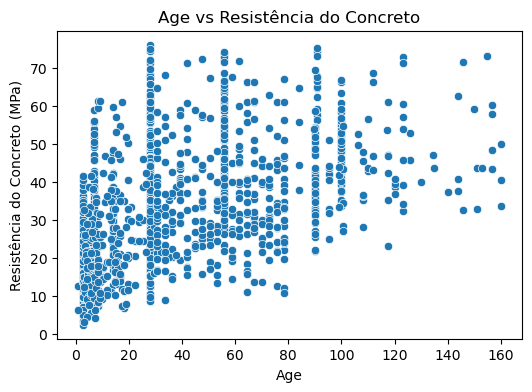

In [246]:
variaveis = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water',
             'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']

for var in variaveis:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[var], y=df['Concrete compressive strength'])
    plt.title(f"{var} vs Resistência do Concreto")
    plt.xlabel(var)
    plt.ylabel("Resistência do Concreto (MPa)")
    plt.show()

In [248]:
df_novo = pd.DataFrame([{
    'Cement': 550,
    'Blast Furnace Slag': 150,
    'Fly Ash': 0,
    'Water': 180,
    'Superplasticizer': 2.5,
    'Coarse Aggregate': 1000,
    'Fine Aggregate': 700,
    'Age': 25
}])


predicao = model.predict(df_novo)
print(f"Resistência do concreto: {predicao[0]:.2f}")

Resistência do concreto: 51.72


In [249]:
#Chegamos na conclusão que o modelo satisfaz o objetivo de calcular a resistência do cimento com base nos dados escritos